In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import hmean

In [44]:
data= pd.read_csv('Data\PhiUSIIL_Phishing_URL_Dataset.csv')
df=data

In [31]:
data.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

### Data Cleaning

In [47]:
# Select columns for URL and domain length-related harmonic mean
url_domain_columns = ['URLLength', 'DomainLength', 'TLDLength', 'NoOfSubDomain', 'NoOfLettersInURL', 'NoOfDegitsInURL']

# Function to calculate harmonic mean for URL and domain length-related columns
def calculate_harmonic_mean_url_domain(row):
    values = row[url_domain_columns]
    non_zero_values = [x for x in values if x > 0]
    
    if len(non_zero_values) > 0:
        return hmean(non_zero_values)
    else:
        return 0

# Apply function to create a new column for harmonic mean of URL and domain features
data['HarmonicMeanURLDomainLength'] = data.apply(calculate_harmonic_mean_url_domain, axis=1)

# Keep `LineOfCode` and other important features as is
data[['LineOfCode', 'LargestLineLength', 'HarmonicMeanURLDomainLength']].head()


,LineOfCode,LargestLineLength,HarmonicMeanURLDomainLength
0,558,9381,3.418070
1,618,9381,2.911904
2,467,682,4.360704
3,6356,26824,3.330337
4,6089,28404,3.443294


In [51]:
data['label'].corr(data['HarmonicMeanURLDomainLength'])

np.float64(-0.34961493142760297)

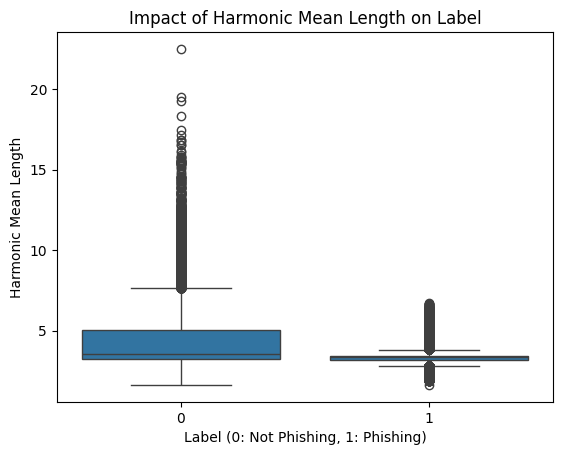

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for visualizing the impact on label
sns.boxplot(x='label', y='HarmonicMeanURLDomainLength', data=df)
plt.title('Impact of Harmonic Mean Length on Label')
plt.xlabel('Label (0: Not Phishing, 1: Phishing)')
plt.ylabel('Harmonic Mean Length')
plt.show()


In [63]:
from sklearn.linear_model import LogisticRegression

# Prepare data
X = df[['HarmonicMeanURLDomainLength']]
y = df['label']

# Fit logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Get coefficients
coef = log_reg.coef_[0][0]
print(f"Coefficient of Harmonic Mean Length: {coef}")


Coefficient of Harmonic Mean Length: -0.8260254219580696


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Assuming df is your DataFrame

# Step 1: Select relevant features
features = ['URLLength', 'DomainLength', 'TLDLength', 'NoOfSubDomain', 'NoOfLettersInURL', 'NoOfDegitsInURL','HarmonicMeanURLDomainLength']
X = df[features]
y = df['label']

# Step 2: Fit logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)




c:\Users\MUNI SAI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
# Step 3: Extract coefficients
coefficients = log_reg.coef_[0]

# Step 4: Create a DataFrame for easy plotting
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Step 5: Sort the DataFrame by the absolute value of coefficients
coef_df['AbsCoefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=False)



In [73]:
log_reg.coef_[0]

array([ 3.01655509,  1.13868842, -0.17749557, -4.81500557, -4.27930747,
       -5.36871405, -0.20893699])

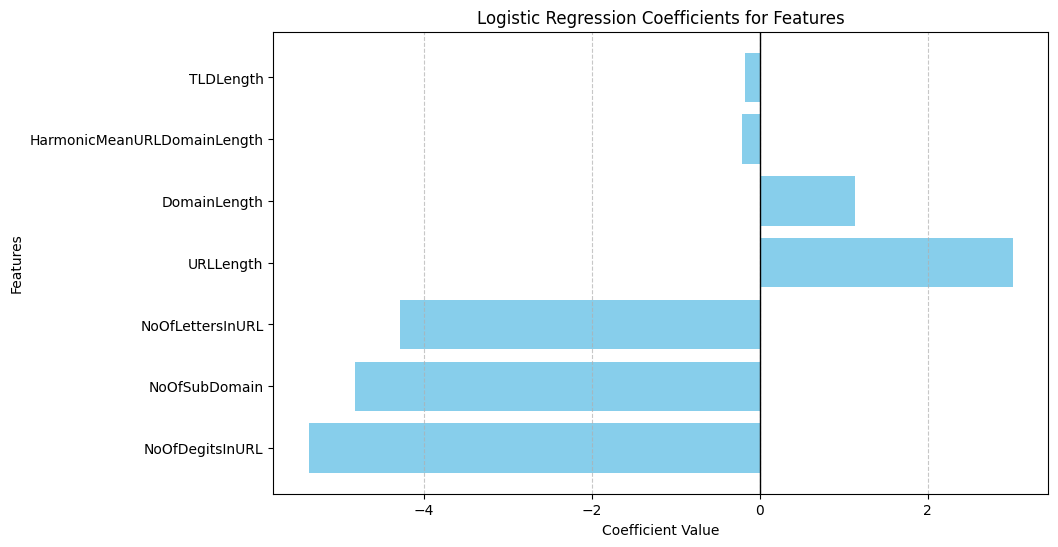

In [75]:
# Step 6: Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.axvline(0, color='black', lw=1)  # Add a vertical line at 0
plt.title('Logistic Regression Coefficients for Features')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

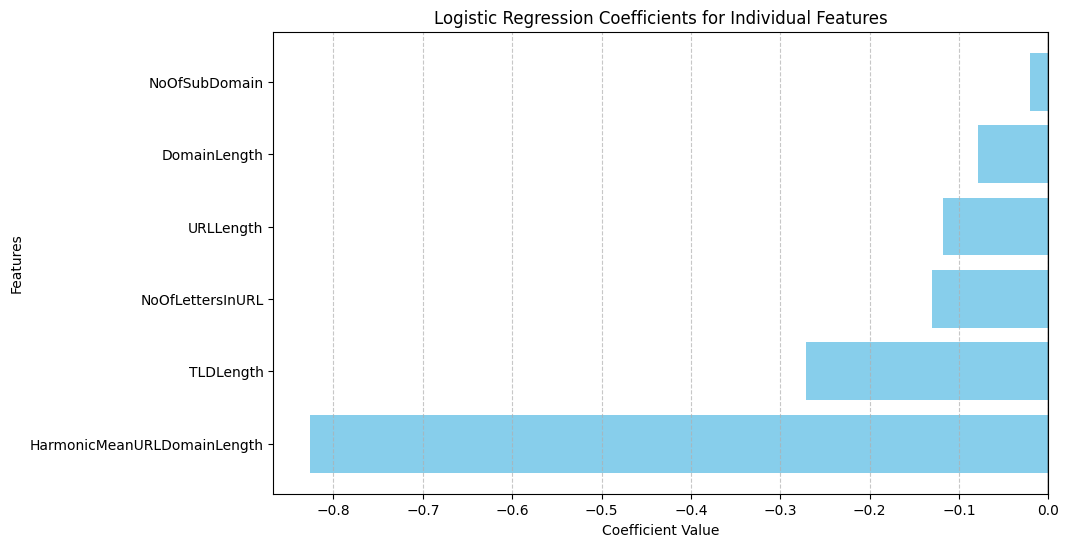

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Assuming df is your DataFrame and the harmonic mean feature is calculated
features = ['URLLength', 'DomainLength', 'TLDLength', 'NoOfSubDomain', 'NoOfLettersInURL','HarmonicMeanURLDomainLength']


# Prepare a DataFrame to store coefficients
coefficients = []

# Fit models for each feature
for feature in features:
    X = df[[feature]]
    y = df['label']
    
    log_reg = LogisticRegression()
    log_reg.fit(X, y)
    
    # Store the feature name and coefficient
    coefficients.append({
        'Feature': feature,
        'Coefficient': log_reg.coef_[0][0]
    })

# Create a DataFrame for easy plotting
coef_df = pd.DataFrame(coefficients)

# Step 5: Sort the DataFrame by absolute value of coefficients
coef_df['AbsCoefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=False)

# Step 6: Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.axvline(0, color='black', lw=1)  # Add a vertical line at 0
plt.title('Logistic Regression Coefficients for Individual Features')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


### Shannon Entropy Formula

#### $$H= -∑(p(x)log_2 p(x))$$

In [80]:
import pandas as pd
import numpy as np
from collections import Counter
import math

# Assuming df is your DataFrame and the URL is stored in the 'URL' column

# Function to calculate Shannon entropy
def calculate_entropy(text):
    # Count frequency of each character
    frequency = Counter(text)
    total_len = len(text)
    
    # Shannon entropy formula
    entropy = -sum((count / total_len) * math.log2(count / total_len) for count in frequency.values())
    return entropy

# Function to extract domain, path, and query from the URL
from urllib.parse import urlparse

def extract_url_components(url):
    parsed_url = urlparse(url)
    return parsed_url.netloc, parsed_url.path, parsed_url.query

# Apply entropy calculation to each URL component
data['DomainEntropy'] = data['URL'].apply(lambda url: calculate_entropy(extract_url_components(url)[0]))
data['PathEntropy'] = data['URL'].apply(lambda url: calculate_entropy(extract_url_components(url)[1]))
data['QueryEntropy'] = data['URL'].apply(lambda url: calculate_entropy(extract_url_components(url)[2]))

# Display the new entropy columns
print(data[['DomainEntropy', 'PathEntropy', 'QueryEntropy']].head())


   DomainEntropy  PathEntropy  QueryEntropy
0       3.657268          0.0           0.0
1       3.327820          0.0           0.0
2       3.629220          0.0           0.0
3       3.576618          0.0           0.0
4       3.430457          0.0           0.0


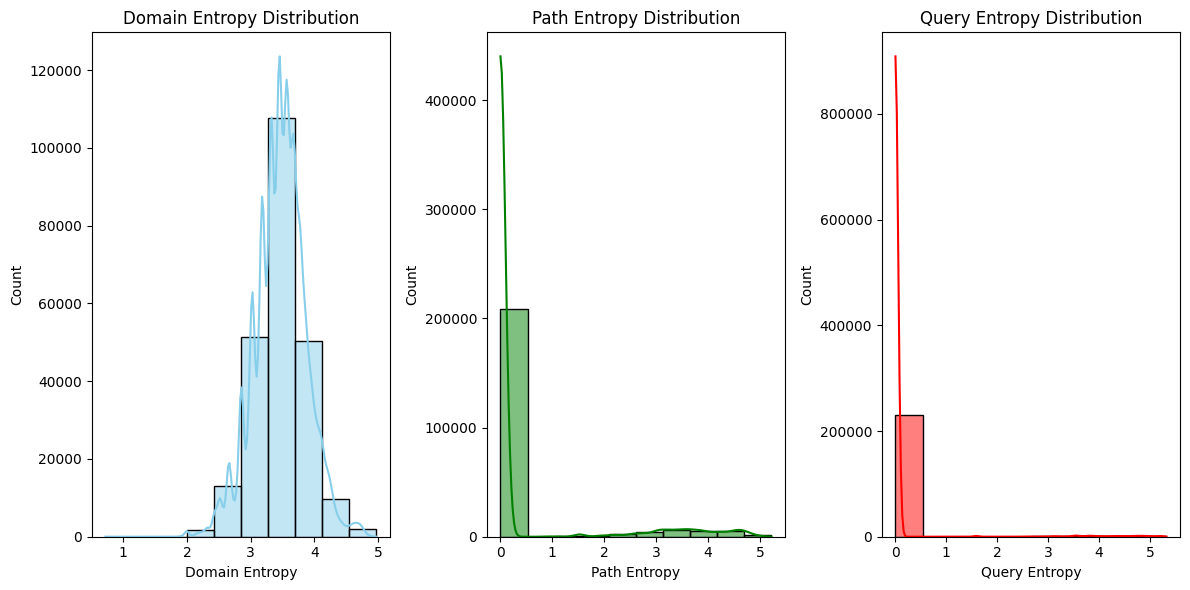

In [81]:
# Plot the entropies
plt.figure(figsize=(12, 6))

# Use seaborn to create a plot with multiple subplots
plt.subplot(1, 3, 1)
sns.histplot(data['DomainEntropy'], bins=10, kde=True, color='skyblue')
plt.title('Domain Entropy Distribution')
plt.xlabel('Domain Entropy')

plt.subplot(1, 3, 2)
sns.histplot(data['PathEntropy'], bins=10, kde=True, color='green')
plt.title('Path Entropy Distribution')
plt.xlabel('Path Entropy')

plt.subplot(1, 3, 3)
sns.histplot(data['QueryEntropy'], bins=10, kde=True, color='red')
plt.title('Query Entropy Distribution')
plt.xlabel('Query Entropy')

plt.tight_layout()
plt.show()

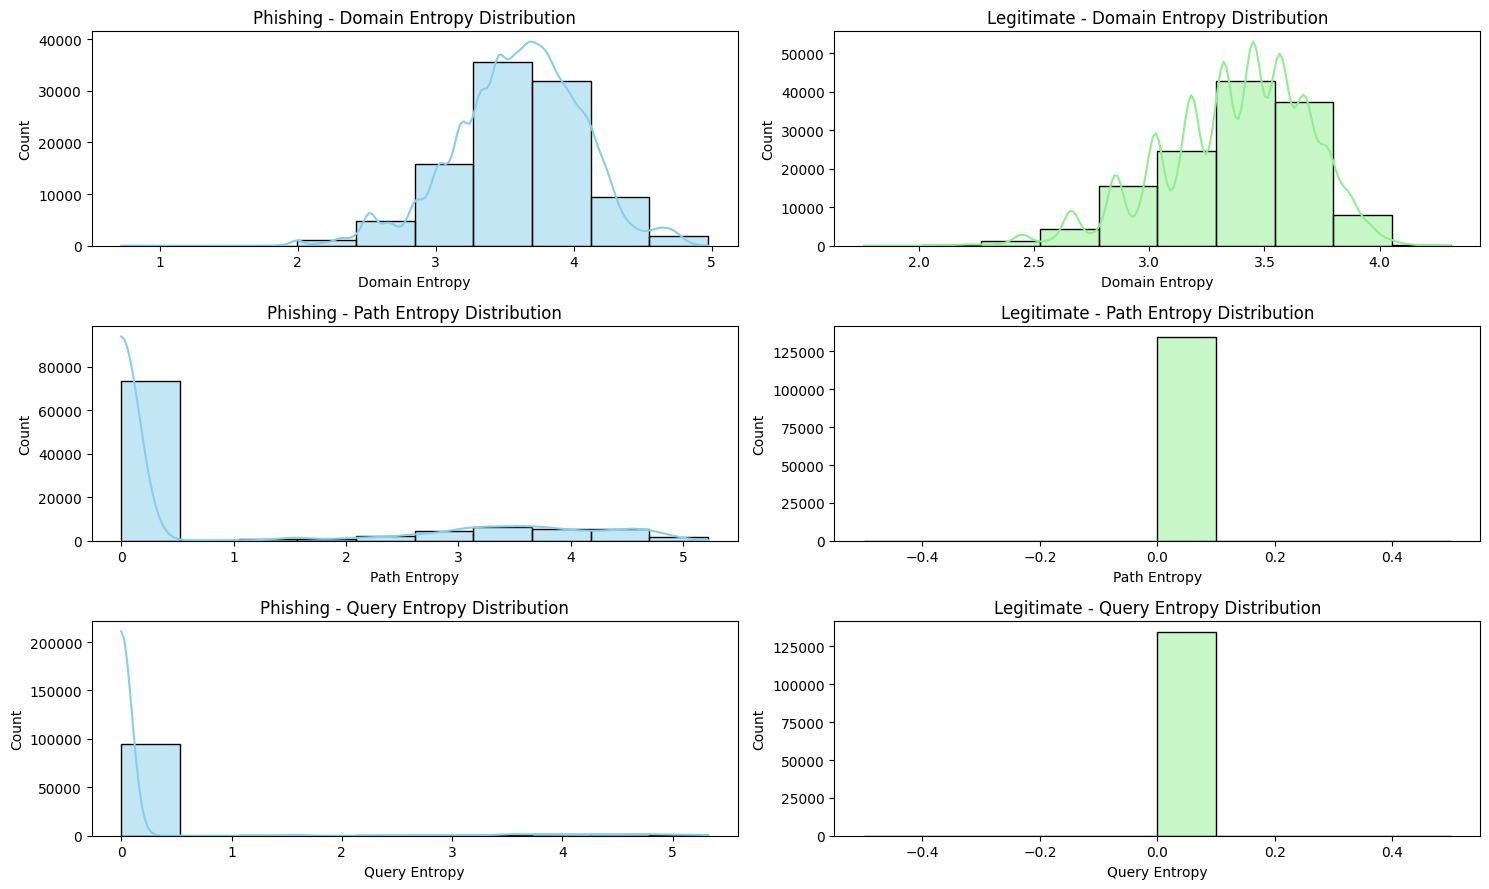

In [83]:
# Split the data into phishing and legitimate based on the 'label' column
phishing_data = data[data['label'] == 0]
legitimate_data = data[data['label'] == 1]

# Set up the figure and axes for the subplots
plt.figure(figsize=(15, 9))

# Domain Entropy for Phishing vs Legitimate URLs
plt.subplot(3, 2, 1)
sns.histplot(phishing_data['DomainEntropy'], bins=10, kde=True, color='skyblue', label='Phishing')
plt.title('Phishing - Domain Entropy Distribution')
plt.xlabel('Domain Entropy')

plt.subplot(3, 2, 2)
sns.histplot(legitimate_data['DomainEntropy'], bins=10, kde=True, color='lightgreen', label='Legitimate')
plt.title('Legitimate - Domain Entropy Distribution')
plt.xlabel('Domain Entropy')

# Path Entropy for Phishing vs Legitimate URLs
plt.subplot(3, 2, 3)
sns.histplot(phishing_data['PathEntropy'], bins=10, kde=True, color='skyblue', label='Phishing')
plt.title('Phishing - Path Entropy Distribution')
plt.xlabel('Path Entropy')

plt.subplot(3, 2, 4)
sns.histplot(legitimate_data['PathEntropy'], bins=10, kde=True, color='lightgreen', label='Legitimate')
plt.title('Legitimate - Path Entropy Distribution')
plt.xlabel('Path Entropy')

# Query Entropy for Phishing vs Legitimate URLs
plt.subplot(3, 2, 5)
sns.histplot(phishing_data['QueryEntropy'], bins=10, kde=True, color='skyblue', label='Phishing')
plt.title('Phishing - Query Entropy Distribution')
plt.xlabel('Query Entropy')

plt.subplot(3, 2, 6)
sns.histplot(legitimate_data['QueryEntropy'], bins=10, kde=True, color='lightgreen', label='Legitimate')
plt.title('Legitimate - Query Entropy Distribution')
plt.xlabel('Query Entropy')

plt.tight_layout()
plt.show()
